In [136]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt

In [137]:
df = pd.read_excel('IV-DATA.xlsx')

In [138]:
threshhold = 0.7
applicants_groups = df.drop(['Question'], axis=1)
applicants_means = applicants_groups.groupby('Applicant').mean().reset_index()
features = applicants_means.drop(['Applicant'], axis=1)
binary_features = features.applymap(lambda x: 1 if x > threshhold else 0)
binary_df = pd.concat([applicants_means['Applicant'], binary_features], axis=1)




In [139]:
target_traits=["communicative","confident","attentive","resilient","empathetic","problem-solving","action-oriented","adaptable"]
binary_features["mean"]=binary_features[target_traits].mean(axis=1)
# binary_features=pd.concat([df['Applicant'],binary_features],axis=1)

candidates = 25
top_candidates_df=binary_features.sort_values(by=['mean'],ascending=False).head(candidates)
top_candidates_df_index=top_candidates_df.index
top_candidates_df_index=binary_df.iloc[top_candidates_df_index]
top_candidates_df


,achiever,action-oriented,active,adaptable,agile,ambitious,attentive,calm,caring,clever,...,sure,systematic,task-oriented,thorough,tolerant,triumphant,trustworthy,useful,wise,mean
83,0,1,1,1,0,0,1,0,1,1,...,1,0,0,1,1,0,1,1,1,0.875
12,0,1,1,1,0,0,1,0,1,1,...,0,0,0,1,0,0,1,1,1,0.875
54,0,1,1,1,0,0,1,0,1,1,...,1,1,1,1,1,0,1,1,1,0.875
30,0,1,1,1,0,0,1,0,1,1,...,1,0,0,1,0,0,0,1,1,0.875
57,0,1,1,1,0,0,1,0,1,1,...,0,0,0,1,0,0,0,1,1,0.875
26,0,1,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0.875
23,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0.875
18,0,1,1,1,0,0,1,0,1,1,...,0,0,0,1,0,0,1,1,1,0.875
64,1,1,1,1,0,0,1,0,1,1,...,0,1,0,1,0,0,1,1,1,0.875
14,0,1,0,1,0,0,1,0,1,1,...,0,0,0,1,0,0,0,1,1,0.875


In [140]:
target_traits = ["reliable", "patient", "stable", "adaptable", "resilient", "determined", "persistent", "satisfied"]
target_traits_df = top_candidates_df_index[target_traits]
target_traits_df

,reliable,patient,stable,adaptable,resilient,determined,persistent,satisfied
83,1,0,1,1,1,0,1,1
12,1,0,0,1,1,0,1,1
54,1,1,0,1,1,1,1,0
30,1,0,0,1,1,0,1,1
57,1,0,0,1,1,0,1,1
26,1,0,0,1,1,0,1,0
23,0,0,0,1,0,0,0,0
18,1,0,1,1,1,1,1,1
64,1,0,0,1,1,0,1,0
14,0,0,0,1,1,0,0,0


/Users/tomer.shukhman/anaconda3/envs/innervue/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tomer.shukhman/anaconda3/envs/innervue/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tomer.shukhman/anaconda3/envs/innervue/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tomer.shukhman/anaconda3/envs/innervue/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

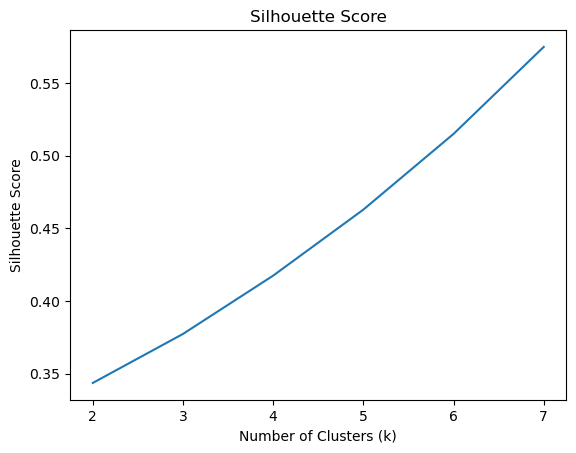

In [141]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming you have your data stored in the variable 'X'

# Elbow Method

X = target_traits_df
# wcss = []
silhouette_scores = []
k_values = range(2, 8)  # Range of k values to try

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    # wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))


# Plotting the silhouette scores
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()




In [142]:
k=5
# k=silhouette_scores.index(max(silhouette_scores))+2
print(k)
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
    # wcss.append(kmeans.inertia_)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
target_traits_df['cluster'] = labels
target_traits_df



/Users/tomer.shukhman/anaconda3/envs/innervue/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5


/var/folders/b1/9mxt04xj57qg0q48b2b677cm0000gn/T/ipykernel_84309/2928254864.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_traits_df['cluster'] = labels


,reliable,patient,stable,adaptable,resilient,determined,persistent,satisfied,cluster
83,1,0,1,1,1,0,1,1,4
12,1,0,0,1,1,0,1,1,2
54,1,1,0,1,1,1,1,0,0
30,1,0,0,1,1,0,1,1,2
57,1,0,0,1,1,0,1,1,2
26,1,0,0,1,1,0,1,0,3
23,0,0,0,1,0,0,0,0,1
18,1,0,1,1,1,1,1,1,4
64,1,0,0,1,1,0,1,0,3
14,0,0,0,1,1,0,0,0,1


In [143]:
cluster_means = np.mean(cluster_centers, axis=1)

max_index = np.argmax(cluster_means)
print(f"The cluster with the highest mean is cluster {max_index}")
cluster_means

The cluster with the highest mean is cluster 4


array([0.6875    , 0.21875   , 0.58928571, 0.47916667, 0.8125    ])

In [144]:
target_traits_df=target_traits_df[target_traits_df['cluster']==max_index]
target_traits_df

,reliable,patient,stable,adaptable,resilient,determined,persistent,satisfied,cluster
83,1,0,1,1,1,0,1,1,4
18,1,0,1,1,1,1,1,1,4


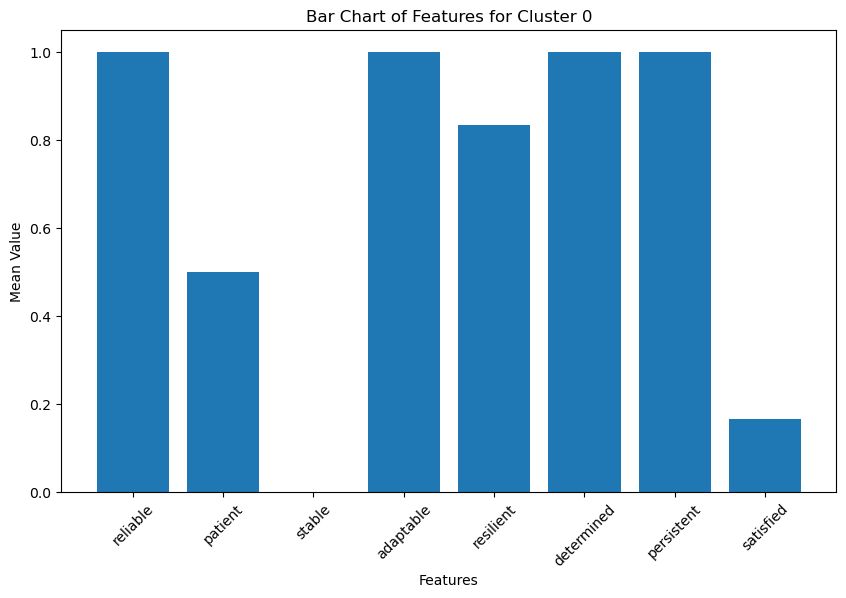

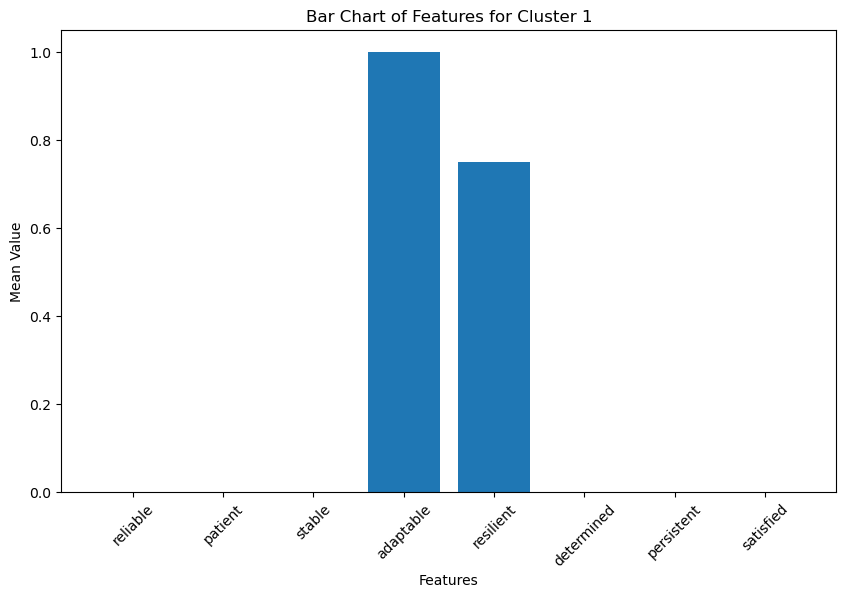

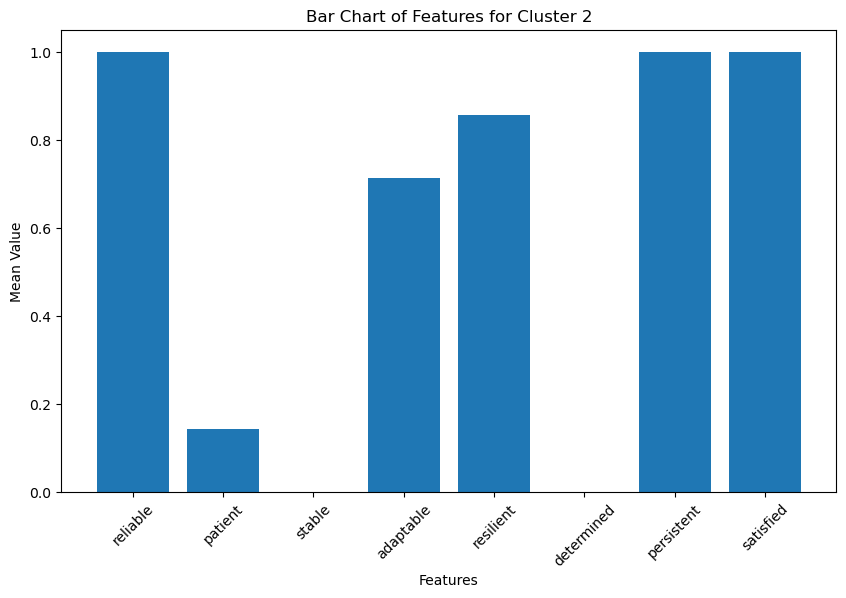

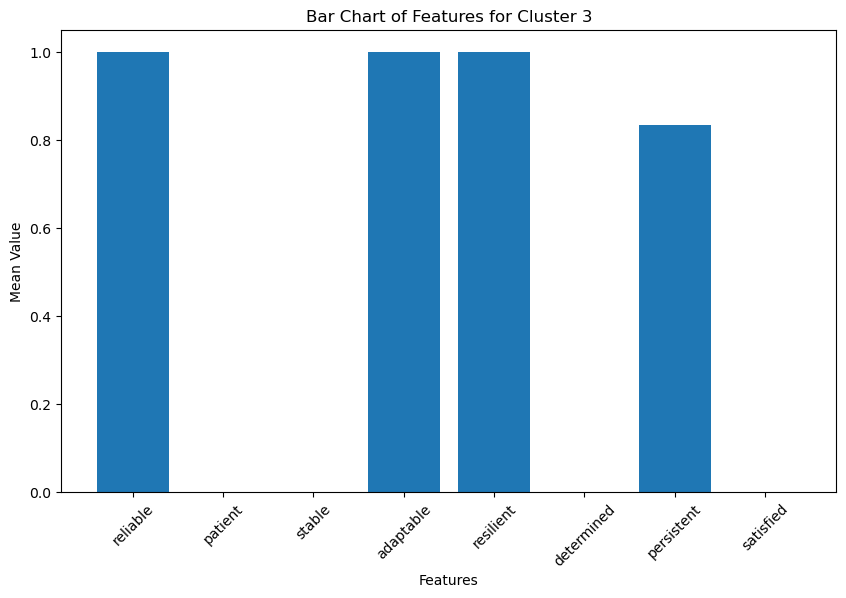

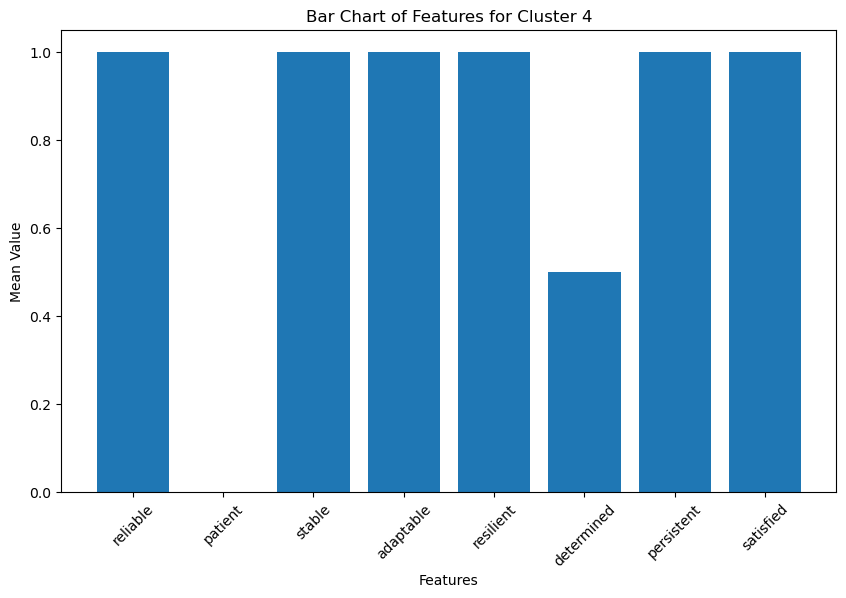

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming binary_features is your DataFrame containing the binary features
# Assuming labels contain the cluster labels assigned by KMeans

# Concatenate the binary_features DataFrame and the cluster labels
top_candidates_df['cluster'] = labels

# Group the data by cluster
cluster_groups = top_candidates_df.groupby('cluster')[target_traits]

# Generate bar charts for each cluster
for cluster, data in cluster_groups:
    cluster_means = data.mean()
    features = cluster_means.index

    plt.figure(figsize=(10, 6))
    plt.bar(features, cluster_means)
    plt.xlabel('Features')
    plt.ylabel('Mean Value')
    plt.title('Bar Chart of Features for Cluster {}'.format(cluster))
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
target_traits=["communicative","confident","attentive","resilient","empathetic","problem-solving","action-oriented","adaptable"]
target_traits_df = binary_features[target_traits]
target_traits_df["mean"]=target_traits_df.mean(axis=1)
target_traits_df=pd.concat([df['Applicant'],target_traits_df],axis=1)
target_traits_df

In [ ]:
candidates = 10
top_candidates_df=target_traits_df.sort_values(by=['mean'],ascending=False).head(candidates)
top_candidates_df